In [8]:
import pandas as pd
import sklearn
import json
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

In [22]:
import seaborn

In [10]:
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("/home/doodle/pedro/data/training_data/train_k27.csv.gz")

In [4]:
df.head()

,countrycode,drawing,recognized,timestamp,word,y,cv
0,IT,"[[[1, 1, 9, 42, 61, 85, 107, 136, 156, 165, 19...",True,2017-03-08 21:00:51.437010,necklace,194,27
1,RU,"[[[0, 3, 3, 8, 8, 11, 32, 77, 104, 146, 156, 1...",True,2017-03-15 08:33:47.781930,foot,122,27
2,US,"[[[3, 9, 3, 0, 8, 39, 65, 133, 229, 255, 193, ...",True,2017-03-23 12:48:25.292450,piano,216,27
3,RU,"[[[12, 161, 231, 229, 218, 198, 162, 95, 70, 4...",True,2017-03-28 14:38:17.896340,saw,245,27
4,US,"[[[48, 32, 4, 0, 7, 20, 36, 74, 91, 82, 55, 44...",False,2017-03-05 04:06:51.726000,bottlecap,36,27


In [4]:
df["drawing"] = df["drawing"].apply(json.loads)

In [5]:
df["numStrokes"] = df["drawing"].apply(len)

In [20]:
df.countrycode =df.countrycode.astype('category').cat.codes 

In [40]:
X = df[['numStrokes']].values

In [41]:
Y = df["recognized"].apply(int)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [43]:
model = RandomForestClassifier(n_estimators=100)

In [44]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
model.score(X_test, y_test)

0.9161250075463345

In [39]:
model.score(X_train, y_train)

0.947206489682112

In [46]:
sum(Y)/len(Y)

0.9149591689708326

In [48]:
num_misclassified = Counter()

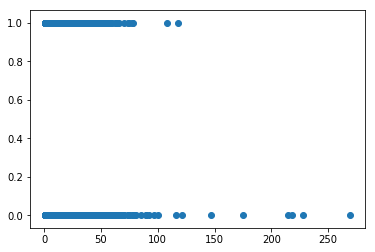

In [12]:
plt.scatter(df["numStrokes"], df["recognized"].apply(int))

In [13]:
strokes_to_counts = Counter()
strokes_to_wrong = Counter()
for numStroke, isRecognized in zip(df["numStrokes"], df["recognized"].apply(int)):
    strokes_to_counts[numStroke] += 1
    strokes_to_wrong[numStroke] += isRecognized


In [16]:
classification_ratios = [strokes_to_wrong[numStroke]/strokes_to_counts[numStroke] for numStroke in sorted(strokes_to_counts.keys())]

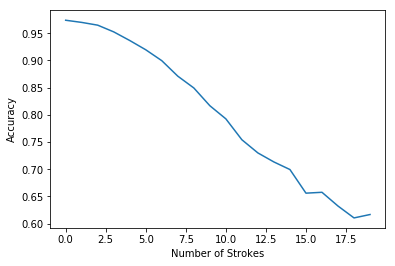

In [24]:
plt.xlabel("Number of Strokes")
plt.ylabel("Accuracy")
plt.plot(list(range(len(strokes_to_counts)))[:20], classification_ratios[:20])

In [25]:
CATEGORIES =['trumpet',
 'cloud',
 'airplane',
 'light bulb',
 'face',
 'couch',
 'paint can',
 'toothbrush',
 'saw',
 'baseball',
 'ice cream',
 'squiggle',
 'mouth',
 'soccer ball',
 'spoon',
 'matches',
 'peas',
 'finger',
 'duck',
 'broccoli',
 'flip flops',
 'pond',
 'cell phone',
 'elephant',
 'kangaroo',
 'bathtub',
 'bulldozer',
 'paper clip',
 'spreadsheet',
 'pillow']

In [29]:
accuracies = []

In [30]:
for cat in CATEGORIES:
    file = "/home/doodle/pedro/data/training_data_grouped/"+cat+".csv"
    df = pd.read_csv(file, nrows=1000)
    accuracies.append(sum(df["recognized"])/len(df["recognized"]))
    

In [31]:
accuracies

[0.857,
 0.976,
 0.898,
 0.954,
 0.913,
 0.94,
 0.896,
 0.947,
 0.938,
 0.937,
 0.972,
 0.922,
 0.948,
 0.948,
 0.967,
 0.844,
 0.873,
 0.937,
 0.852,
 0.96,
 0.921,
 0.917,
 0.934,
 0.849,
 0.88,
 0.862,
 0.876,
 0.949,
 0.872,
 0.937]

In [34]:
accuracies.index(0.844)

15

In [36]:
CATEGORIES[0]

'trumpet'